# Credit Card Fraud Detection Model Using Random Forest
<hr><hr>

## **Author**: *Okechukwu Edozieunor*
<hr>

### 1. Problem Definition
Fraud detection involves identifying transactions that are potentially fraudulent, which is crucial in industries like banking and e-commerce. We'll build a binary classification model that predicts whether a transaction is fraudulent (1) or not (0).

### 2. Dataset & Source
We'll use the popular "Credit Card Fraud Detection" dataset from Kaggle. It contains: <br>

- 284,807 transactions
- 492 frauds (only ~0.17% --> high class imbalance)
- Features are anonymized using `PCA (V1, V2, ..., V28)`, plus Time, Amount, and Class.

#### What is PCA?

**PCA (Principal Component Analysis)** is a dimensionality reduction technique in machine learning/statistics.

- Imagine you have a dataset with many correlated variables. PCA transforms them into a new set of uncorrelated variables called principal components.

- These new variables (V1, V2, …, V28 in our dataset) are linear combinations of the original features.

- PCA keeps as much of the variance (information) as possible, while reducing noise and redundancy.

That’s why in this dataset you don’t see raw features like `“Merchant Name,”` `“Transaction Location,”` etc. Instead, you see V1–V28 which are PCA-transformed versions of the real inputs.

#### Why is the dataset anonymized?

This dataset comes from real credit card transactions. To protect customer privacy and comply with regulations (like GDPR, banking rules):

- Original sensitive fields (e.g., card number, merchant, location, transaction type) were removed or transformed.

- PCA was applied to the original numerical features so no one can trace a transaction back to a real person.

- The Time column was also anonymized (just seconds since first transaction instead of real timestamps).

This way, researchers can still build fraud detection models while ensuring no personal information is leaked.

### In Summary:

**PCA**: Converts original features into anonymized numerical components that still capture the data’s patterns.

**Anonymization**: Ensures no sensitive user information is exposed while making the dataset useful for research.

### 3. Tools and Libraries
For training of this model, we'll use: <br>

- Python
- Pandas for data handling
- Scikit-learn for modeling
- Matplotlib/Seaborn for visualization
- RandomForest for predictive modeling
<hr>

## Import Libraries

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# load datasets
df = pd.read_csv('creditcard.csv')

## Data Overview

In [4]:
# The first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# shape of the dataset (rows and columns)
df.shape

(284807, 31)

In [7]:
# Converting all columns to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

**Comment**: The dataset has `284807` rows and `31` columns

In [8]:
# Exploring the time column
df[['time']]

,time
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0
...,...
284802,172786.0
284803,172787.0
284804,172788.0
284805,172788.0


### Interpretation
In this dataset, the `Time` column does not represent real-world time like `HH:MM:SS`. Instead:

`Time` is the seconds elapsed between each transaction and the first transaction in the dataset.

So, for example:

A `Time` value of 0 means the transaction happened at the start (reference transaction).

A `Time` value of 100000 means the transaction occurred 100,000 seconds (~27.8 hours) after the first recorded transaction.

**The reason for this**: the dataset was anonymized for privacy. Actual timestamps (dates and times) were removed to prevent tracing back to real individuals. Instead, they only kept the relative transaction time.

That’s why you don’t see normal hours/minutes — it’s just elapsed seconds.

In [9]:
# The class column (Fraud = 1, Non-Fraud = 0)
df[['class']]

,class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [9]:
# Summary statistics of the Numerical Variable
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
# display the columns
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [10]:
# The value counts of the class variable. There are fraudulent and non-fraudulent transactions
df['class'].value_counts()

class
0    284315
1       492
Name: count, dtype: int64

- 0 --> Non-Fraudulent (284315)
- 1 --> Fraudulent (492)

The **Class** is highly imbalanced

In [42]:
df.dtypes

time           float64
v1             float64
v2             float64
v3             float64
v4             float64
v5             float64
v6             float64
v7             float64
v8             float64
v9             float64
v10            float64
v11            float64
v12            float64
v13            float64
v14            float64
v15            float64
v16            float64
v17            float64
v18            float64
v19            float64
v20            float64
v21            float64
v22            float64
v23            float64
v24            float64
v25            float64
v26            float64
v27            float64
v28            float64
amount         float64
class            int64
class_label     object
dtype: object

## Data Cleaning and Preprocessing

In [23]:
# check for missing values
df.isnull().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

**Comment**: There's no missing value in our dataset.

In [ ]:
# check for duplicated rows
df.duplicated().sum()

**Comment**: There are `1081` duplicate rows. We'll remove them to have a clean data for model development.

In [11]:
# drop duplicate rows but keep the first row
df = df.drop_duplicates(keep='first')

In [12]:
# check for duplicated rows again
df.duplicated().sum()

np.int64(0)

**Comment**: Now, the duplicated rows have been removed!

In [10]:
df.shape

(283726, 31)

**Comment**: We now have `283726` rows after dropping duplicate rows. This is what we will use for building our model

## Explore the Class Imbalance

class
0    283253
1       473
Name: count, dtype: int64


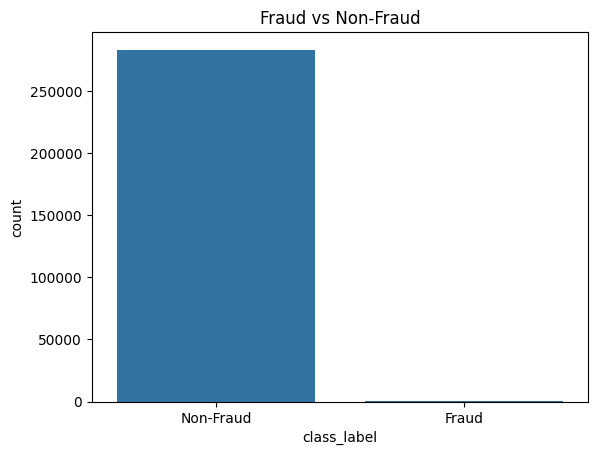

In [13]:
# Explore the class balance between fraudulent and non-fraudulent transactions and plot on a chart

# Mapping the "class" column with string categories instead of numerical ones

class_mapping = {
    0: "Non-Fraud",
    1: "Fraud"
}

df['class_label'] = df['class'].map(class_mapping)

print(df['class'].value_counts())
sns.countplot(x='class_label', data=df)
plt.title("Fraud vs Non-Fraud")
plt.show()

In [27]:
class_df

0         Non-Fraud
1         Non-Fraud
2         Non-Fraud
3         Non-Fraud
4         Non-Fraud
            ...    
284802    Non-Fraud
284803    Non-Fraud
284804    Non-Fraud
284805    Non-Fraud
284806    Non-Fraud
Name: class, Length: 283726, dtype: object

**Comment**: From the chart above, it can be seen that the Non-Fraudulent transactions are higher than the Fraudulent transactions, hence high class imbalance.

## Outlier Detection and Treatment

### Detecting Outliers

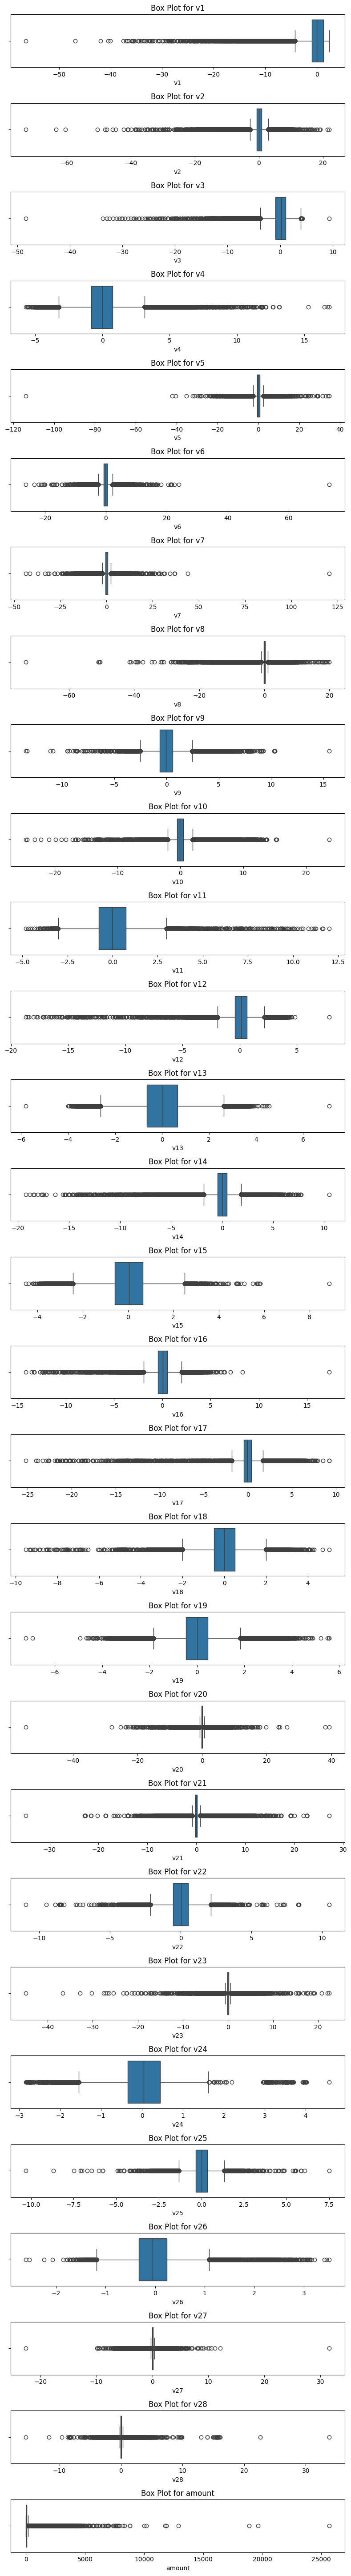

In [14]:
## Detecting outliers on numerical columns

# Filter numerical columns for box plots
dropped_df = df.drop(['time', 'class'], axis=1)
numerical_features = dropped_df.select_dtypes(include=['number']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(8, len(numerical_features) * 2))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=dropped_df[col])
    plt.title(f"Box Plot for {col}")
    plt.tight_layout()

plt.show()

#the job of enumerate(numerical_features, 1) is to loop over the list 'numerical_features' while also keeping track of an index i starting from 1.

**Interpretation**: From the boxplot, we can see that some variables has significant outliers which can affect our model performance. Now, we'll move ahead to remove these outliers using `IQR (Interquartile Range)` Technique.

### Handling Outliers using IQR (Interquartile Range) Technique

In [15]:
# Define the IQR Outlier Removal Function
def remove_outliers_iqr(dropped_df, column):
    Q1 = dropped_df[column].quantile(0.25)
    Q3 = dropped_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return dropped_df[(dropped_df[column] >= lower_bound) & (dropped_df[column] <= upper_bound)]

dropped_df = dropped_df
numerical_columns = dropped_df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    dropped_df = remove_outliers_iqr(dropped_df, col)

**Comment**: The outliers have been successfully handled using IQR technique.

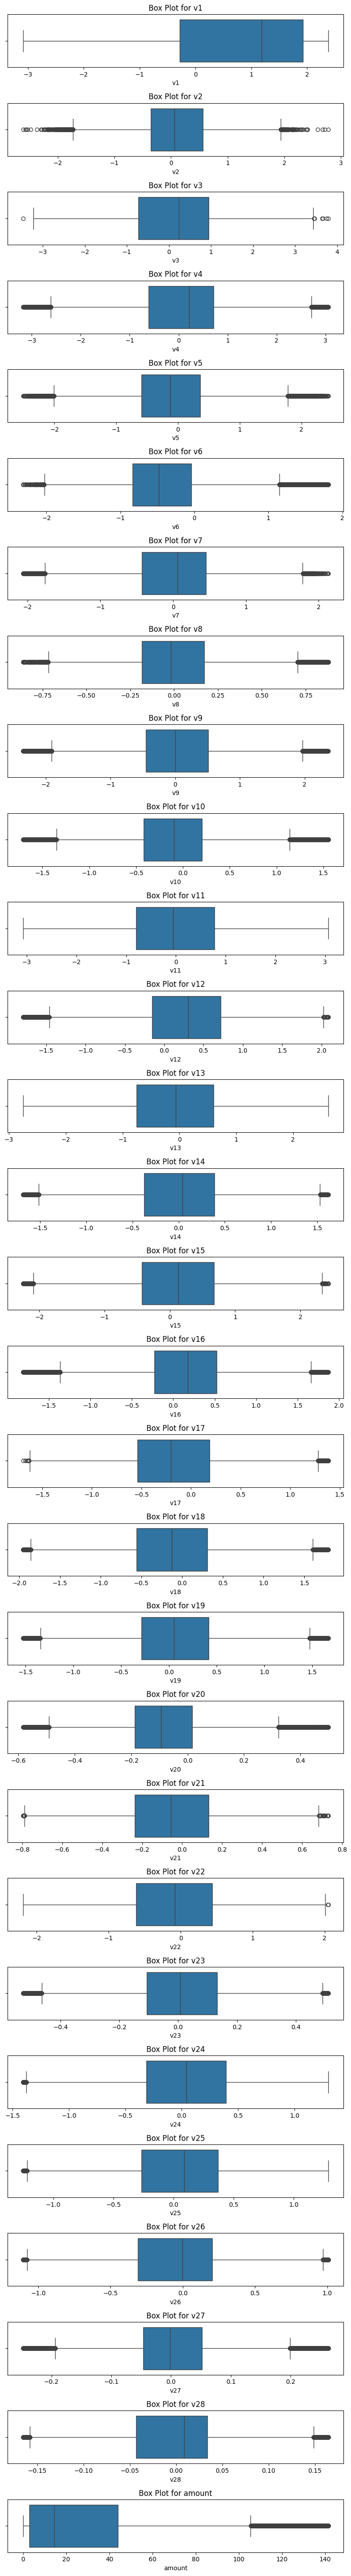

In [16]:
## Rechecking if outliers still exist

# Filter numerical columns for box plots
numerical_features = dropped_df.select_dtypes(include=['number']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(8, len(numerical_features) * 2))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=dropped_df[col])
    plt.title(f"Box Plot for {col}")
    plt.tight_layout()

plt.show()

#the job of enumerate(numerical_features, 1) is to loop over the list 'numerical_features' while also keeping track of an index i starting from 1.

**Interpretation**: The outliers has been handled successfully as we can see from the boxplot!

## Scaling and Model Development

### Separating the Independent variables and the target variables (class)

In [17]:
# separating the features from the target (class), to get our independent variables
X = df.drop(['class', 'time', 'class_label'], axis=1)  # Independent variables.  X now holds the features (like Amount, V1 through V28) that will be used to train the model.
y = df['class']  # Target variable (our label). This is what the model will learn to predict

In [18]:
X.shape

(283726, 29)

### Standard Scaling

In [19]:
# Amount before scaling
X[['amount']]

,amount
0,149.62
1,2.69
2,378.66
3,123.50
4,69.99
...,...
284802,0.77
284803,24.79
284804,67.88
284805,10.00


In [20]:
# Scaling Amount
from sklearn.preprocessing import StandardScaler

# Standardizing the amount column in the dataset
scaler = StandardScaler()
X['amount'] = scaler.fit_transform(X[['amount']])

In [21]:
# Amount after scaling
X[['amount']]

,amount
0,0.244200
1,-0.342584
2,1.158900
3,0.139886
4,-0.073813
...,...
284802,-0.350252
284803,-0.254325
284804,-0.082239
284805,-0.313391


**Comment**: The amount variable has been successfully scaled! Machine learning models, especially those based on distances, often perform better when features are on the same scale. Right now, the Amount column has values ranging from 0 to thousands, while the other features (V1 to V28) are already PCA-transformed and roughly centered around 0.

So, to bring Amount to a similar scale, we use StandardScaler.

In [22]:
# Amount before
df['amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: amount, dtype: float64

In [23]:
# Amount after
X.amount.describe()

count    2.837260e+05
mean    -5.409347e-17
std      1.000002e+00
min     -3.533268e-01
25%     -3.309625e-01
50%     -2.654671e-01
75%     -4.378088e-02
max      1.022476e+02
Name: amount, dtype: float64

**Comment**: Now, all the features in X, including Amount, are on roughly the same scale, which helps the model train more effectively and avoid bias toward features with larger numerical ranges.

For more clarity, let's plot a graph of Amount before and after standardization using Histogram

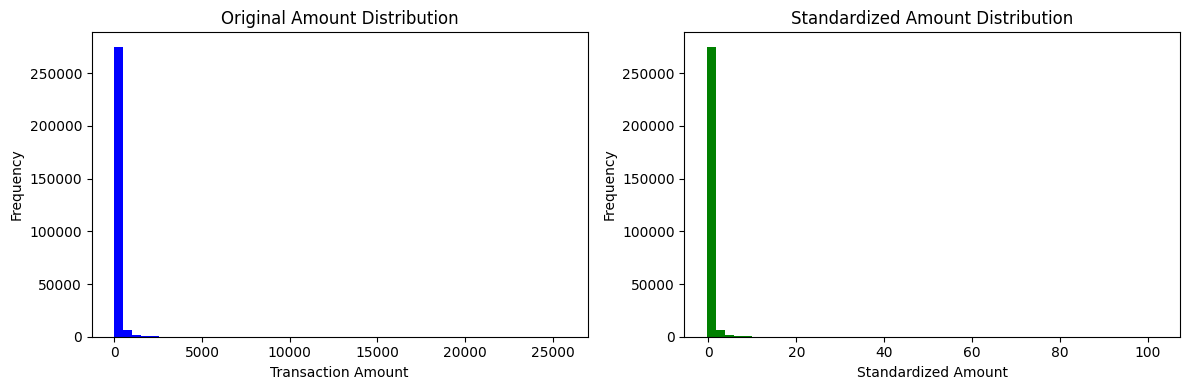

In [24]:
# Histogram chart of Amount before and after Standardization

plt.figure(figsize=(12, 4))

# Before Standardization
plt.subplot(1, 2, 1)
plt.hist(df['amount'], bins=50, color='blue')
plt.title('Original Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# After Standardization
plt.subplot(1, 2, 2)
plt.hist(X['amount'], bins=50, color='green')
plt.title('Standardized Amount Distribution')
plt.xlabel('Standardized Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Chart Interpretation
### Original Amount Distribution:
Here, we’re looking at the raw transaction amounts just as they appear in the dataset.

- You’ll notice that most transactions are clustered near the lower amounts, maybe 0 to 500.

- But there are a few transactions that go very high, even above 20,000, these are what we call outliers.

- The problem with this is that machine learning models might give more attention to big values, even if they’re not fraudulent, just because they’re large.


## Standardized Amount Distribution:
Now this is the same data, but we've used something called standardization.

- What we did here was rescale the Amount values so that they have a mean of 0 and a standard deviation of 1.

- Most of the values are now around zero, while the extreme transactions (either very high or low) are now far from zero.

- This helps the machine learning model treat all features fairly, especially when combining Amount with other features like time, frequency, etc.

## Why This Matters
By standardizing the Amount feature:

- We make the dataset more balanced and fair.

- We help the model focus on patterns, not just large numbers.

- We improve the chances of detecting fraud based on real behavioral signals, not just big transactions.

## Model Development

### Split the dataset into training and testing sets

In [25]:
# split the data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(226980, 29) (56746, 29)
(226980,) (56746,)


### Model Training and Evaluation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

## Model Performance Evaluation

# Define models to train and evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": LinearSVC(),
    "XGB": XGBClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'accuracy': acc,
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'classification_report': report
    }

In [27]:
# Confusion matrix and the ROC-AUC Score
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

[[56653     3]
 [   27    63]]
ROC-AUC Score: 0.8499735244281276


## Interpretation of ROC-AUC Score

### What ROC–AUC means

**ROC (Receiver Operating Characteristic)** curve plots the trade-off between True Positive Rate (Recall) and False Positive Rate at different thresholds.

**AUC (Area Under the Curve)** tells us how well the model separates the two classes across all thresholds.

**AUC** values range from:

0.5 → Random guessing (no discrimination ability).

1.0 → Perfect separation between fraud and non-fraud.

### Interpreting our result (≈0.85)

`0.85` means the model has good discriminative ability.
Put simply, if you randomly pick one fraud and one non-fraud transaction, there’s an **85%** chance the model assigns a higher fraud probability to the fraud case than to the non-fraud one.

This is stronger than random guessing, but not perfect.

In fraud detection tasks, **ROC–AUC > 0.80** is generally considered decent, **> 0.90** is excellent.

### What it tells us about your model

Even though the accuracy looked almost perfect (99.95%), the ROC–AUC of **0.85** reveals that the model still struggles to fully separate fraud from non-fraud.

This matches what you saw in the classification report:

- High precision for fraud (predicts fraud correctly when it does predict it).

- Moderate recall (misses ~27% of fraud cases).

The ROC–AUC shows that overall, the model’s fraud detection is useful, but can be improved.

### Final Interpretation
Our Random Forest can correctly rank fraud vs non-fraud transactions about **85%** of the time. That’s solid, but since fraud detection is high-stakes, we’d likely want to improve it (e.g., by adjusting class weights, resampling, or threshold tuning) to increase fraud recall.

### The Classification report for each model

In [28]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, digits=4))
    print("="*60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56656
           1     0.8750    0.5444    0.6712        90

    accuracy                         0.9992     56746
   macro avg     0.9371    0.7722    0.8354     56746
weighted avg     0.9991    0.9992    0.9991     56746

Model: Decision Tree
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9995     56656
           1     0.7053    0.7444    0.7243        90

    accuracy                         0.9991     56746
   macro avg     0.8524    0.8720    0.8619     56746
weighted avg     0.9991    0.9991    0.9991     56746

Model: Random Forest
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     56656
           1     0.9706    0.7333    0.8354        90

    accuracy                         0.9995     56746
   macro avg     0.9851    0.8666    0.9176     56746
weigh

## Model Selection
### ==> RandomForestClassifier was selected as the best model

## Interpretation
Based on the `Classification Report`, the **`RandomForestClassifier`** performed better than the rest of the models with an Accuracy of **`0.9995`** and a recall of `0.7333`, hence, selected.

The Random Forest model is excellent at correctly identifying non-fraud transactions, with near-perfect precision and recall for class 0.
However, for fraud detection (class 1), while it is very precise (few false positives), it misses about 1 in 4 fraudulent transactions due to lower recall (0.7333).

#### Class 0 (Non-Fraud)

- **Precision** = 0.9996 → Of all transactions predicted as non-fraud, 99.96% were truly non-fraud.

- **Recall** = 1.0000 → The model caught all of the non-fraud cases.

- **F1** = 0.9998 → Almost perfect balance of precision and recall.

- **Support** = 56,656 → The vast majority of samples belong to this class (expected in this imbalanced dataset).

The model is excellent at detecting non-fraudulent transactions.

#### Class 1 (Fraud)

- **Precision** = 0.9706 → Of the transactions predicted as fraud, ~97% were truly fraud.

- **Recall** = 0.7333 → The model detected only 73% of actual frauds. About 27% of fraudulent cases were missed.

- **F1** = 0.8354 → Good, but not perfect. Shows the recall limitation.

- **Support** = 90 → Very few fraud cases compared to non-fraud.

The model is good at precision (low false alarms), but its recall is weaker (it misses some fraud cases). This is due to the high class imbalance!

#### Overall (Accuracy & Averages)

- **Accuracy = 0.9995 (99.95%)** → Looks extremely high, but mostly because of the heavy imbalance (most transactions are non-fraud).

- **Macro Avg (0.9851 precision, 0.8666 recall, 0.9176 F1)** → Takes the simple average between classes. Shows the imbalance problem: the fraud class drags recall down.

- **Weighted Avg (≈0.9995 across the board)** → Weighted by support, so dominated by class 0. Makes it look almost perfect, hiding the struggle with class 1.

### Retraining the Best Model --> *RandomForestClassifier*

In [29]:
# Collect evaluation metrics for the best model (Random Forest)
from sklearn.metrics import classification_report

# Retraining Random Forest
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



## Interpretation

Our retrained Random Forest model is near-perfect for non-fraud transactions and very precise for frauds, but it still fails to catch about 1 in 4 fraud cases. Accuracy looks perfect, but the recall for fraud is the limiting factor due to high class imbalance.

Let me clarify what I mean by ***"1 in 4 fraud cases"***:

**From Our report**:

Fraud (class 1) Recall = 0.73
→ Recall means: Of all the actual fraud transactions, how many did the model catch?

**So**:

Out of 100 real fraud transactions, the model successfully caught about 73.

That means it missed about 27.

Missing ~27 out of 100 ≈ missing about 1 in every 4 fraud cases.

## Confusion Matrix

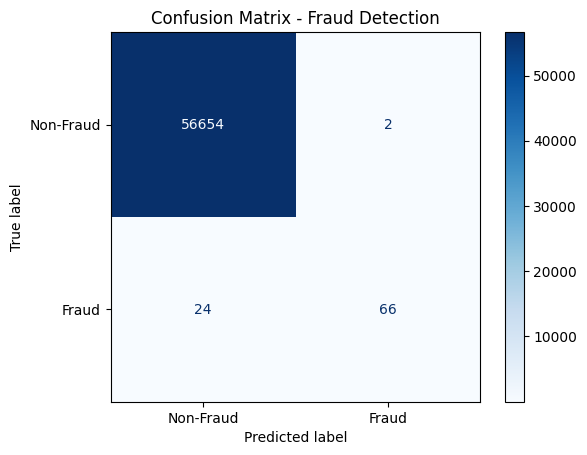

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Let's generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Fraud Detection")
plt.show()

## What does a Confusion Matrix do?

A confusion matrix is an array with 4 numbers. <br>
`[[TN FP]`<br>
`[FN TP]]`

`56654 (TN)` = True Negatives (Non-Fraud transactions correctly predicted)

`2 (FP)` = False Positives (Non-Fraud wrongly flagged as Fraud)

`24 (FN)` = False Negatives (Fraud missed by the model)

`66 (TP)` = True Positives (Fraud correctly caught)

## Plotting the ROC-AUC Curve

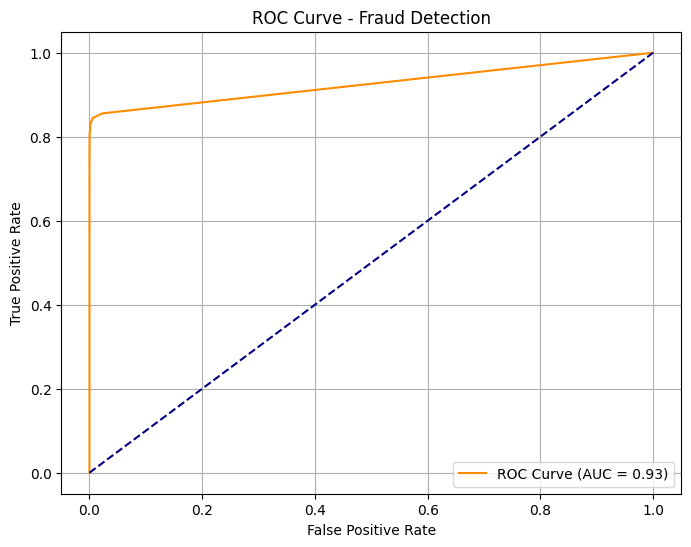

In [31]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores instead of class labels
y_scores = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # This is a Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## The ROC-AUC Curve Interpretation

### 1. What the ROC Curve Shows

- True Positive Rate (TPR, aka Recall or Sensitivity):
Out of all actual frauds, how many were caught?

$$
TPR = \frac{TP}{TP + FN}
$$

- False Positive Rate (FPR):
Out of all non-fraud cases, how many were wrongly flagged as fraud?

$$
FPR = \frac{FP}{FP + TN}
$$

The ROC curve plots TPR (y-axis) vs FPR (x-axis) at all possible thresholds.

- Threshold = 0.5 means: classify as fraud if probability > 0.5.

- But we can vary this cutoff → 0.1, 0.9, etc.
Each threshold gives you a different TPR/FPR pair.

### 2. The Diagonal Baseline (random guess)

- The navy dashed line is where a useless model would fall (like flipping a coin).

- It has AUC = 0.5 → meaning the model is no better than chance.

### 3. The Curve of Your Model

- Your darkorange curve shows how well our model balances TPR vs FPR.

- The closer it hugs the top-left corner, the better:

    - High TPR (catch frauds).

    - Low FPR (don’t wrongly accuse non-fraud).

### 4. The AUC Value

- AUC (Area Under Curve) = probability that the model ranks a random fraud higher than a random non-fraud.

- Example: If AUC = 0.85, then 85% of the time the model gives a higher fraud probability to a fraud case than to a non-fraud case.

### 5. Why it’s Useful for Fraud Detection

- Fraud datasets are heavily imbalanced (way more legit transactions than fraud).

- Accuracy can look great but hide the fact that frauds are missed.

- ROC-AUC focuses on ranking ability → how well the model separates fraud vs non-fraud.

- If AUC is close to 1, the model is very good.

- If AUC ≈ 0.5, it’s just guessing.

**So in practice**:

- An AUC around 0.85–0.90 (like your earlier result) is strong, showing our Random Forest is good at separating fraud from non-fraud.

- But since fraud is rare, you might also want to check the Precision-Recall (PR) curve, which is often more informative than ROC when the data is imbalanced.

## Heatmap of Actual vs Predicted

Text(0.5, 23.52222222222222, 'Predicted')

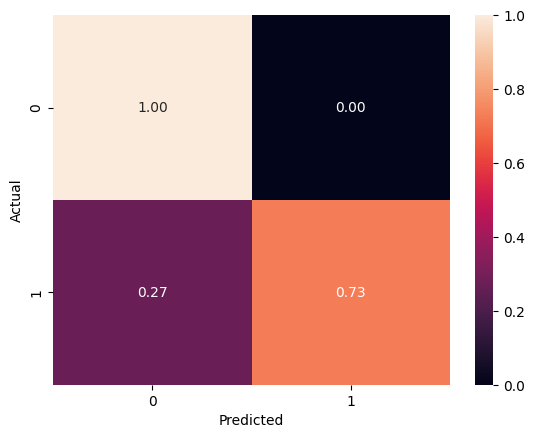

In [32]:
actual = np.sum(cm, axis=1).reshape(-1,1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## What the Chart Represents
a. Axes:

- The rows represent the actual classes (ground truth labels).
- The columns represent the predicted classes (output from the classification model).

b. Diagonal Cells:

The diagonal cells (top-left to bottom-right) indicate the proportion of correct predictions for each class. For example, the model correctly predicted:

- 100% of Non-Fraud were classified as Non-Fraud.
- 73% of Fraud were classified as Fraud.

c. Off-Diagonal Cells:

The off-diagonal cells indicate the proportion of misclassifications (where the model predicted the wrong class):
- 0.00% of Non-Fraud were classified as Fraud
- 27% of Fraud were classified as Non-Fraud

## Feature Importance - Top Features Contributing to Fraud

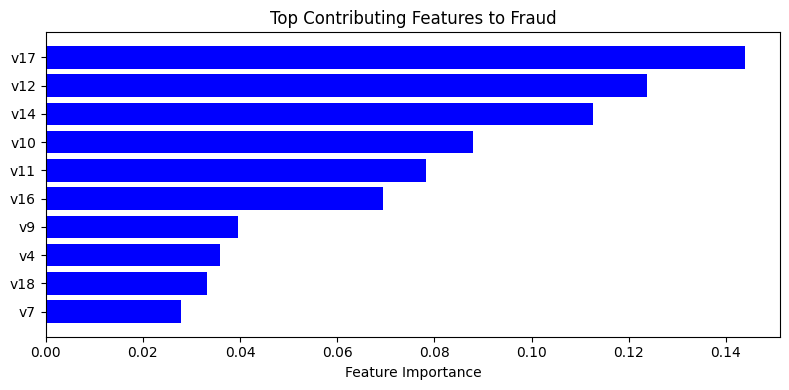

In [33]:
# Get feature importances from the best model
importances = best_model.feature_importances_

# Match to column names
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = importance_df.head(10)

# Plot top features
plt.figure(figsize=(8, 4))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.title('Top Contributing Features to Fraud')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [95]:
top_10_features

,Feature,Importance
16,v17,0.143919
11,v12,0.123719
13,v14,0.112683
9,v10,0.087871
10,v11,0.078322
15,v16,0.069365
8,v9,0.039631
3,v4,0.035784
17,v18,0.033202
6,v7,0.027878


## Actionable Insights and Recommendations

### Actionable Insights from Feature Importance

#### 1. Top drivers of fraud detection:

- v17, v12, and v14 are the strongest predictors (together ~38% of total importance).

- This means most of the model’s fraud detection signal comes from these features.

#### 2. Moderately important features:

- v10, v11, and v16 still contribute significantly (~23%).

- These likely capture secondary but still valuable fraud patterns.

#### 3. Lower importance features:

- v9, v4, v18, and v7 are weaker signals (< 4% each).

- While they may not drive predictions much, they can help the model refine decisions in edge cases.

#### 4. Hidden fraud patterns:

- Because this dataset is anonymized (PCA-transformed features), we cannot directly interpret what v17, v12, etc., represent.

- However, the relative ranking suggests which underlying transaction attributes (time, amount, frequency, etc.) have the strongest link to fraud.

### Key Recommendations

#### 1. Prioritize monitoring top features (v17, v12, v14):

- In production fraud systems, you could give these features more weight when flagging suspicious activity.

- For example, transactions with abnormal values in v17 or v12 should trigger higher fraud risk scores.

#### 2. Investigate moderate features (v10, v11, v16):

- Look for interactions between them and the top features.

- Feature engineering (e.g., combining v12 * v10) might improve detection accuracy.

#### 3. Consider feature selection / dimensionality reduction:

- Since lower-ranked features (v9, v4, v18, v7) contribute little, you could experiment with dropping them.

- This may simplify the model and reduce computation without much performance loss.

#### Explainability strategy:

- Even though features are anonymized, techniques like **SHAP** values can help explain individual fraud predictions (why a specific transaction was flagged).

- This helps in compliance and building trust with stakeholders.

#### Model retraining strategy:

- Track whether the importance ranking of features shifts over time.

- In real-world fraud detection, fraudsters change behavior, so monitoring feature drift is crucial.

## Save the Model using Joblib

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("model", best_model)
])

# Train pipeline
pipeline.fit(X_train, y_train)

# Save
joblib.dump(pipeline, "fraud_pipeline.joblib")

print('pipeline saved successfully!')

pipeline saved successfully!
